### <center>Student: *Vorobyov Sergey*</center>

## Description

1. Choose the time period to form the graph
2. Those how are making projects on artilces: half of you need to choose co-authorship graph, others - citation (but consider citation graph as undirected for simplicity)
3. Use weighted graph so that probabilities of infection passing is proportional to the edge weight 

### Data

You need to use data from your project

### Model

Consider SIR-based epidemic model using idea of percolation

Link to source: http://www.leonidzhukov.net/hse/2015/networks/papers/networks-book-ch21.pdf 

### Task

You are in charge of leading the vaccination campaign against some outbroken nonlethal disease. You have options to vactinate or provide medical treatment to infected ones. However, everything has its costs:
* Vaccination of a node costs $500 \$$ and make it immune to the disease all life-long. Unfortunately, you can help this way only to no more than $10\%$ of your nodes
* Medical Treatment costs $120\$$ per day of illness period, which in turn may take from $3$ to $7$ days

Your task is to implement the simulation model, propose some vaccination strategies and compare them (one iteration = one day).

In [1]:
import pickle
import pandas as pd
import networkx as nx
import matplotlib as plt
from matplotlib.pyplot import figure
import random as rd

In [2]:
graph = nx.read_gpickle("citation1.gpickle")
graph

In [3]:
array = graph.edges(data=True)
array = list(array)
array

[('10.1007/s004670050419', '10.1007/s00467-010-1533-y', {'weight': 3}),
 ('10.1007/s00467-010-1533-y', '10.1007/s00467-013-2453-4', {'weight': 1}),
 ('10.1007/s00467-010-1533-y', '10.1007/s00467-006-0379-9', {'weight': 1}),
 ('10.1007/s00467-010-1533-y', '10.1007/BF00445923', {'weight': 1}),
 ('10.1007/s00467-013-2453-4', '10.1186/s13613-016-0145-5', {'weight': 2}),
 ('10.1007/s00467-013-2453-4', '10.1186/cc12503', {'weight': 2}),
 ('10.1007/s00467-013-2453-4', '10.1007/s00467-006-0244-x', {'weight': 1}),
 ('10.1007/s00467-013-2453-4', '10.1186/cc6089', {'weight': 2}),
 ('10.1007/s00467-006-0379-9', '10.1007/s00467-006-0145-z', {'weight': 1}),
 ('10.1007/BF00445923', '10.2165/00003088-200241130-00005', {'weight': 1}),
 ('10.1186/s13613-016-0145-5', '10.1186/cc12503', {'weight': 2}),
 ('10.1186/s13613-016-0145-5', '10.1007/s00134-017-4832-y', {'weight': 2}),
 ('10.1186/s13613-016-0145-5', '10.1186/cc13133', {'weight': 2}),
 ('10.1186/s13613-016-0145-5', '10.1007/s10741-011-9235-5', {'we

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{('10.1007/s004670050419',
  '10.1007/s00467-010-1533-y'): Text(-0.08472833127930679, 0.5139096151495253, '3'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/s00467-013-2453-4'): Text(-0.03368847371892921, 0.30320754172343345, '1'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/s00467-006-0379-9'): Text(-0.13798285697174553, 0.5807250133116995, '1'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/BF00445923'): Text(-0.04716761475866976, 0.5729683303079874, '1'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/s13613-016-0145-5'): Text(0.07796256921398863, 0.0438267598960113, '2'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/cc12503'): Text(0.023617057864114346, 0.08975852716002995, '2'),
 ('10.1007/s00467-013-2453-4',
  '10.1007/s00467-006-0244-x'): Text(0.011418318799468656, 0.2152335859246022, '1'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/cc6089'): Text(-0.03448642664462162, 0.031413483013528025, '2'),
 ('10.1007/s00467-006-0379-9',
  '10.1007/s00467-006-0145-z'): Text(-0.2586119740390697, 0.7766235073

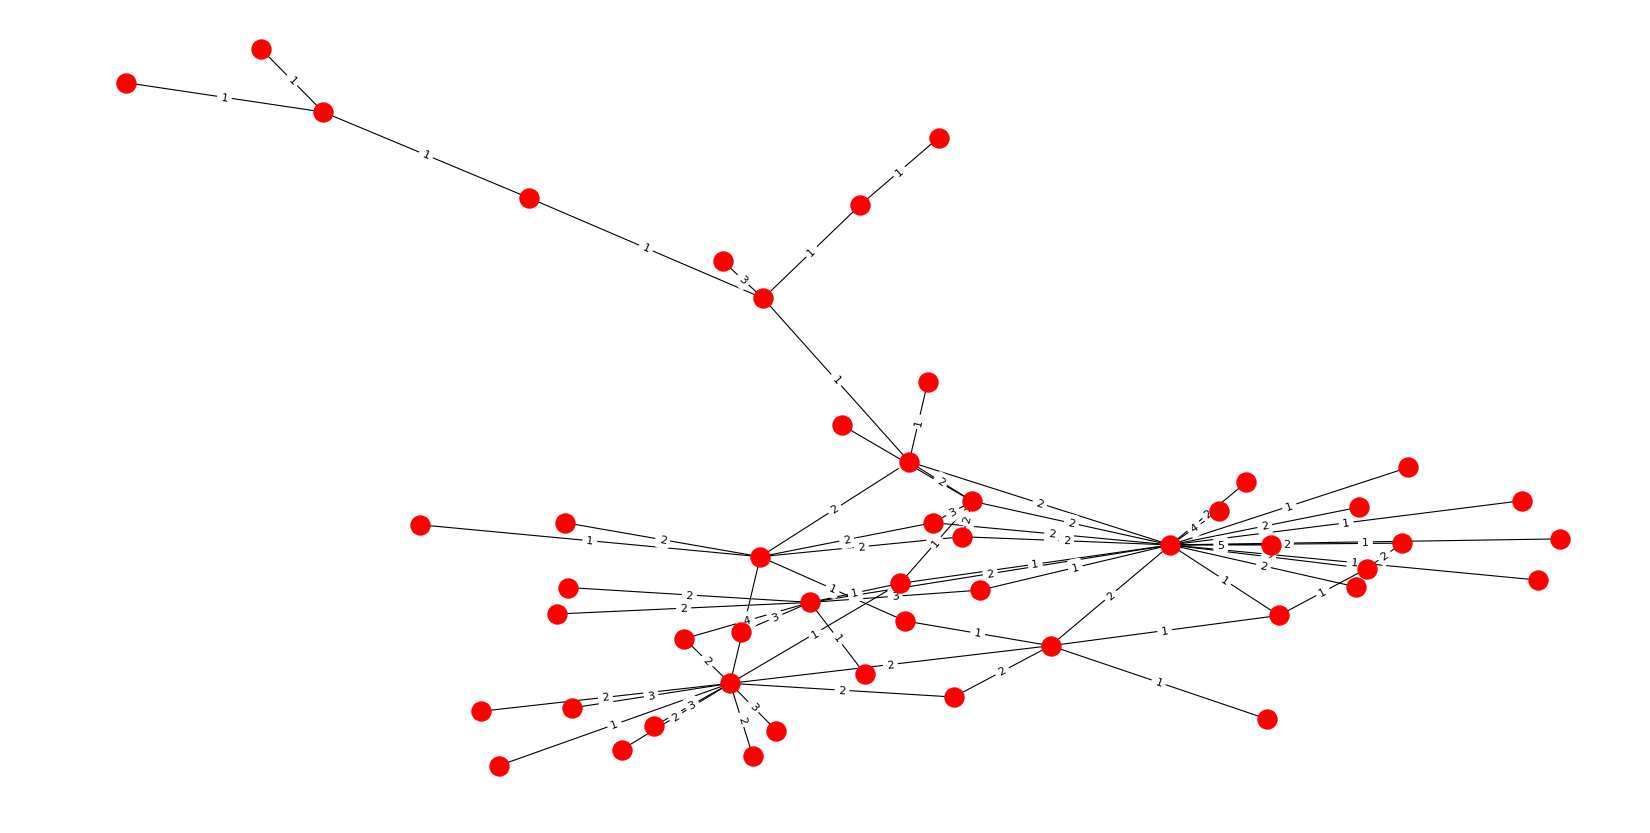

In [4]:
%matplotlib inline
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
G=nx.Graph()
for i in range(len(array)):
    G.add_edge(array[i][0], array[i][1], weight=array[i][2]['weight'])
pos = nx.spring_layout(G)
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


## 1.The first algorithm: neutralize important nodes 

In this algorithm we are going to vaccinate more important vertices to avoid expanding epidemics through them. More important vertices means nodes with largest output degrees. Indeed, if we vaccinate them, we will reduce the speed of expanding of the epidemics. The other steps are directed to treat infected nodes which connected by edges with large probability. 

In [5]:
#SIR and treatment imitation 
def key_for_sorting_first_algorithm(array):
    return array[1]

def set_vaccination_first_algorithm(Graph, recovered):
    nodes_list = list(Graph.nodes())    
    node_degree = []
    weighted_degree = []
    vaccination_number = int(0.1 * len(nodes_list))
    for i in nodes_list:
        node_degree.append([i, Graph.degree(i)])
    node_degree = sorted(node_degree, key = key_for_sorting_first_algorithm, reverse = True)
    for i in range(vaccination_number):
        recovered.append(node_degree[i][0])
        nbhrs = [u for u in Graph.neighbors(node_degree[i][0])]
        for j in nbhrs:
            Graph[node_degree[i][0]][j]['weight']
            weighted_degree.append(Graph[node_degree[i][0]][j]['weight'])
    recovered = list(set(recovered))
    return recovered, weighted_degree

def start_recovering_first_algorithm(Graph, infected, is_recovering):
    nodes_list = list(Graph.nodes())
    checking_is_recovering = []
    for i in range(len(is_recovering)):
        checking_is_recovering.append(is_recovering[i][0])
    checking_is_recovering = list(set(checking_is_recovering))
    
    for i in infected:
        if i not in checking_is_recovering:
            is_recovering.append([i, int(rd.uniform(4,7))])
    return is_recovering

def recovering(is_recovering, recovered):
    for i in range(len(is_recovering)):
        if is_recovering[i][1] == 0:
            recovered.append(is_recovering[i][0])
        else:
            is_recovering[i][1] -= 1
    return is_recovering, recovered

def spread_infection(Graph, infected, suscepted, recovered, begin = False):
    if len(infected) == 0 and begin:
        print("The infection has been destroyed")
        return infected, suscepted, recovered
    
    nodes_list = list(Graph.nodes())
    edges_list_dated = list(Graph.edges(data = True))
    edges_list_pair = list(Graph.edges())
    if begin == False:
        infected_number = int(0.25 * len(nodes_list))
        for i in range(infected_number):
            infected_position = int(rd.random()*1000 % len(nodes_list))
            infected.append(nodes_list[infected_position])
        for i in infected:
            new_suscepted = [i for i in Graph.neighbors(i)]
            for k in new_suscepted:
                suscepted.append(k)
        infected = list(set(infected))
        suscepted = list(set(suscepted))
        for i in infected:
            if i in suscepted:
                suscepted.remove(i)
        return infected, suscepted, recovered
    
    infected_new = []
    for u in infected:
        candidates = [j for j in Graph.neighbors(u)]
        weight = None
        probability = []
        for v in candidates:
            weight = Graph[u][v]['weight']
            for temp in range(weight):
                probability.append((u,v))
        num_of_poteintial_infected = int(rd.uniform(0, len(candidates)))
        num_of_immune_members = len(candidates) - num_of_poteintial_infected
        for k in range(num_of_poteintial_infected):
            sick = int(rd.uniform(0, len(probability)-1))
            if len(probability) == 0:
                break
            infected_new.append(probability[sick][1])

        for s in candidates:
            if s not in infected_new:
                Graph[u][s]['weight'] = 0
        
    for i in infected_new:
        infected.append(i)
    for i in infected:
        new_suscepted = [i for i in Graph.neighbors(i)]
    for k in new_suscepted:
        suscepted.append(k)
    infected = list(set(infected))
    suscepted = list(set(suscepted))
    recovered = list(set(recovered))
    for i in infected:
        if i in suscepted:
            suscepted.remove(i)

    for i in recovered:
        if i in infected:
            infected.remove(i)
        if i in suscepted:
            suscepted.remove(i)
    return infected, suscepted, recovered

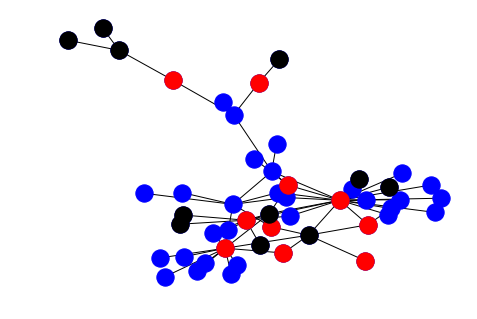

In [6]:
infected = []
suscepted = []
recovered = []
is_recovering = []
infected, suscepted, _ = spread_infection(G, infected, suscepted, recovered)
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')

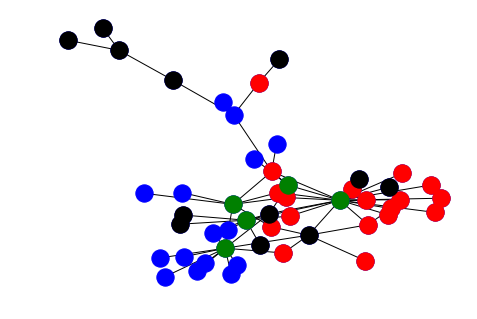

In [7]:
WeghtedDegree = 0
weighted = []
recovered, weighted = set_vaccination_first_algorithm(G, recovered)
is_recovering = start_recovering_first_algorithm(G, infected, is_recovering)
infected, suscepted, recovered = spread_infection(G, infected, suscepted, recovered, begin = True)
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')
nx.draw_networkx_nodes(G , pos, nodelist=recovered, node_color='green')
for i in weighted:
    WeghtedDegree += i

10 days has passed!!!


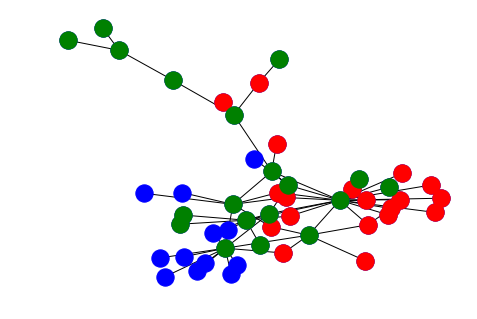

In [8]:
count = 1
while (len(infected) > 0):
    recovered, weighted = set_vaccination_first_algorithm(G, recovered)
    is_recovering = start_recovering_first_algorithm(G, infected, is_recovering)
    is_recovering, recovered = recovering(is_recovering, recovered)
    infected, suscepted, recovered = spread_infection(G, infected, suscepted, recovered, begin = True)
    count += 1
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')
nx.draw_networkx_nodes(G , pos, nodelist=recovered, node_color='green')
print("{} days has passed!!!".format(count))

## Score our first approach 

#### We will use the formula below to score the first algorithm  

$$ SVA = \frac{\sum_{i=1}^n Vaccination}{\sum_{i=1}^m WeightDegree} + (Treatment * TreatedVertices) \: mod \: Days $$

In the first fraction part we will use total amount of funds which were spent on Vaccination divided into sum of weighted degree. The more output weighted degree the smaller fraction. In other words, if we spent money on Vaccination, then Vaccinated nodes has to be important 

In the second part we find total funds which were spent on Treatment, then we use module to get information about our efficiency. The more days we needed to destroy the epidemics, the more second part we have

SVA means Sergey Vorobyov Aleksandrovich

#### Let's calculate metrics 

In [9]:
SVA = (len(recovered)-len(is_recovering))*500/WeghtedDegree + (120*len(is_recovering)) % count
print("SVA is equal to {}".format(SVA))

SVA is equal to 24.03846153846154


## 2.The second algorithm: crush the bridges

In this approach we are going to vaccinate vertices which connected by bridge with each other. Doing that, we can impede the penetration into connected components. After that we are starting to treat infected nodes as in the first approach.

In [10]:
graph = nx.read_gpickle("citation1.gpickle")
graph

In [11]:
array = graph.edges(data=True)
array = list(array)

{('10.1007/s004670050419',
  '10.1007/s00467-010-1533-y'): Text(0.019813851029810616, -0.6054195688421466, '3'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/s00467-013-2453-4'): Text(0.0797099294962936, -0.33861886227594495, '1'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/s00467-006-0379-9'): Text(-0.13217200163668907, -0.6260030445337217, '1'),
 ('10.1007/s00467-010-1533-y',
  '10.1007/BF00445923'): Text(0.04982386897764197, -0.6811066163346777, '1'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/s13613-016-0145-5'): Text(0.06584538956515486, -0.0355618033972169, '2'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/cc12503'): Text(0.15355823269956215, -0.06634915952484934, '2'),
 ('10.1007/s00467-013-2453-4',
  '10.1007/s00467-006-0244-x'): Text(0.23273522887677328, -0.20724102759602897, '1'),
 ('10.1007/s00467-013-2453-4',
  '10.1186/cc6089'): Text(0.20298331037071968, 0.005120856131850662, '2'),
 ('10.1007/s00467-006-0379-9',
  '10.1007/s00467-006-0145-z'): Text(-0.4138524599943293, -0.7379358

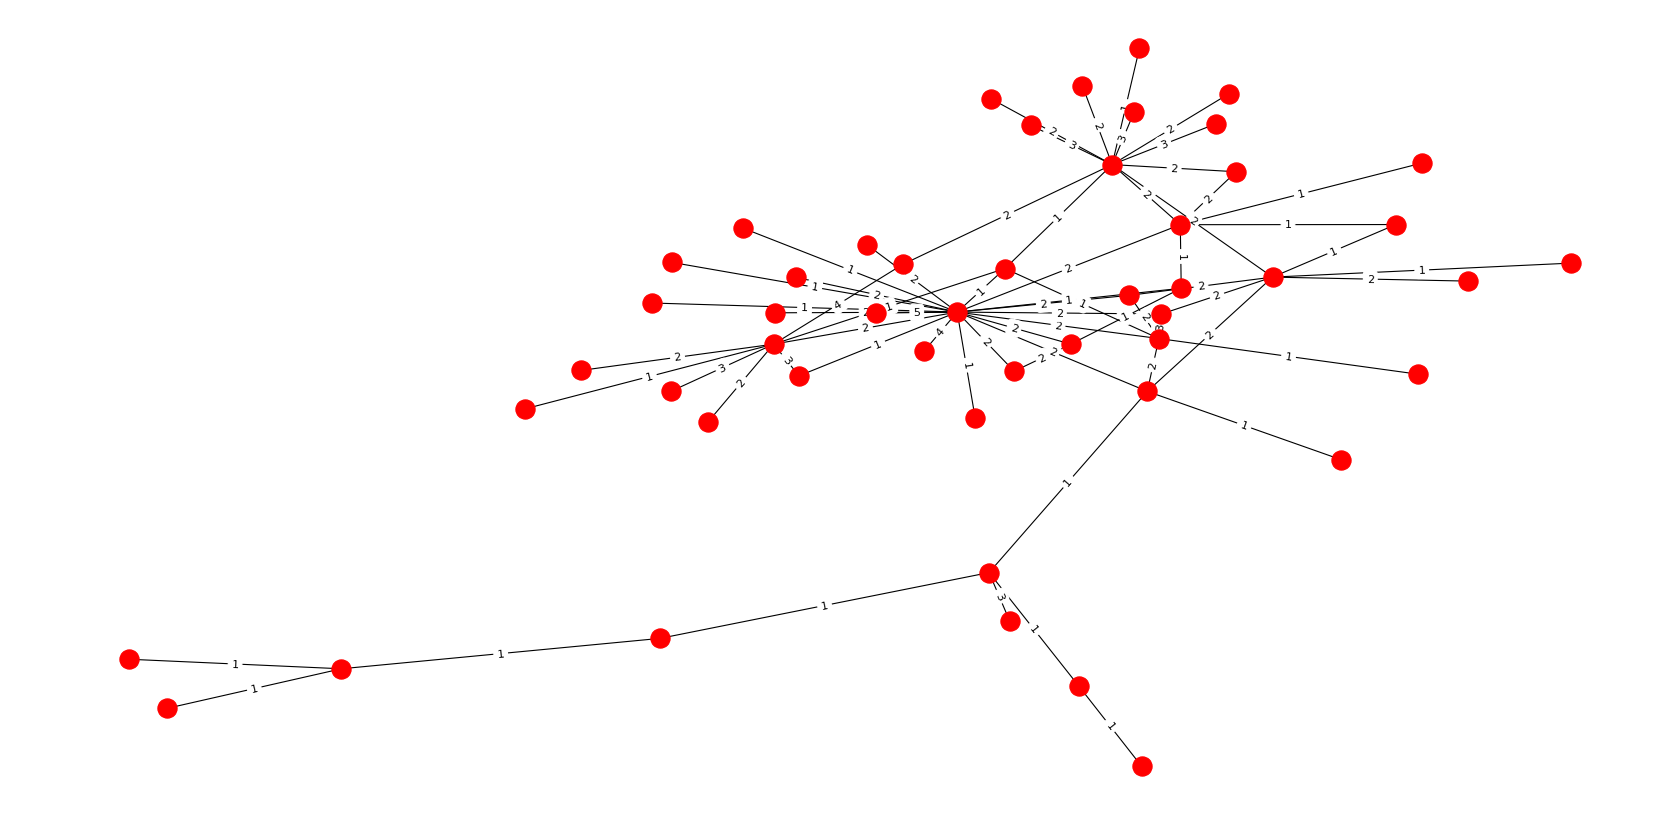

In [12]:
%matplotlib inline
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
G=nx.Graph()
for i in range(len(array)):
    G.add_edge(array[i][0], array[i][1], weight=array[i][2]['weight'])
pos = nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


In [13]:
def set_vaccination_second_algorithm(Graph, recovered):
    nodes_list = list(Graph.nodes())    
    node_degree = []
    weighted_degree = []
    vaccination_number = int(0.1 * len(nodes_list))
    bridges = list(nx.bridges(Graph))
    bridges_nodes = []
    for i in range(len(bridges)):
        for j in range(len(bridges[i])):
            bridges_nodes.append(bridges[i][j])
    bridges_nodes = list(set(bridges_nodes))
    for i in bridges_nodes:
        node_degree.append([i, Graph.degree(i)])
    node_degree = sorted(node_degree, key = key_for_sorting_first_algorithm, reverse = True)
    for i in range(vaccination_number):
        recovered.append(node_degree[i][0])
        nbhrs = [u for u in Graph.neighbors(node_degree[i][0])]
        for j in nbhrs:
            Graph[node_degree[i][0]][j]['weight']
            weighted_degree.append(Graph[node_degree[i][0]][j]['weight'])
    recovered = list(set(recovered))
    return recovered, weighted_degree

def start_recovering_second_algorithm(Graph, infected, is_recovering):
    nodes_list = list(Graph.nodes())
    checking_is_recovering = []
    for i in range(len(is_recovering)):
        checking_is_recovering.append(is_recovering[i][0])
    checking_is_recovering = list(set(checking_is_recovering))
    
    for i in infected:
        if i not in checking_is_recovering:
            is_recovering.append([i, int(rd.uniform(4,7))])
    return is_recovering

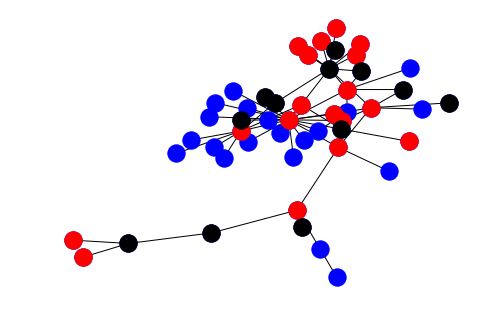

In [14]:
infected = []
suscepted = []
recovered = []
is_recovering = []
infected, suscepted, _ = spread_infection(G, infected, suscepted, recovered)
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')

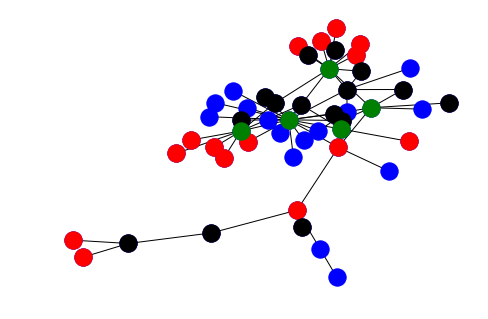

In [15]:
WeghtedDegree = 0
weighted = []
recovered, weighted = set_vaccination_first_algorithm(G, recovered)
is_recovering = start_recovering_first_algorithm(G, infected, is_recovering)
infected, suscepted, recovered = spread_infection(G, infected, suscepted, recovered, begin = True)
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')
nx.draw_networkx_nodes(G , pos, nodelist=recovered, node_color='green')
for i in weighted:
    WeghtedDegree += i

8 days has passed!!!


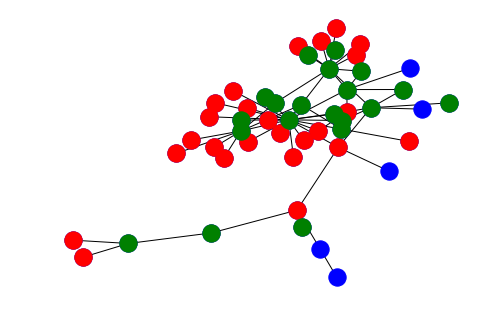

In [16]:
count = 1
while (len(infected) > 0):
    recovered, weighted = set_vaccination_first_algorithm(G, recovered)
    is_recovering = start_recovering_first_algorithm(G, infected, is_recovering)
    is_recovering, recovered = recovering(is_recovering, recovered)
    infected, suscepted, recovered = spread_infection(G, infected, suscepted, recovered, begin = True)
    count += 1
nx.draw(G, pos, node_color = 'blue')
nx.draw_networkx_nodes(G , pos, nodelist=suscepted, node_color='red')
nx.draw_networkx_nodes(G , pos, nodelist=infected, node_color='black')
nx.draw_networkx_nodes(G , pos, nodelist=recovered, node_color='green')
print("{} days has passed!!!".format(count))

### Score our second approach

#### Let's calculate metrics 

In [17]:
SVA = (len(recovered)-len(is_recovering))*500/WeghtedDegree + (120*len(is_recovering)) % count
print("SVA is equal to {}".format(SVA))

SVA is equal to 14.423076923076923


## Conclusion

So, we used and analysed two approaches about stopping the epidemics in the network. According to SVA metrics the first approach demontsrates better result. I think it happened because of closing the paths in large connected components